In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import copy


In [248]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [249]:
df["mainroad"] = (df["mainroad"] == "yes").astype(int)
df["guestroom"] = (df["guestroom"] == "yes").astype(int)
df["basement"] = (df["basement"] == "yes").astype(int)
df["hotwaterheating"] = (df["hotwaterheating"] == "yes").astype(int)
df["airconditioning"] = (df["airconditioning"] == "yes").astype(int)
df["prefarea"] = (df["prefarea"] == "yes").astype(int)
df["furnishingstatus"] = df["furnishingstatus"].map({"furnished": 2, "semi-furnished": 1, "unfurnished": 0})

In [250]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


Plot

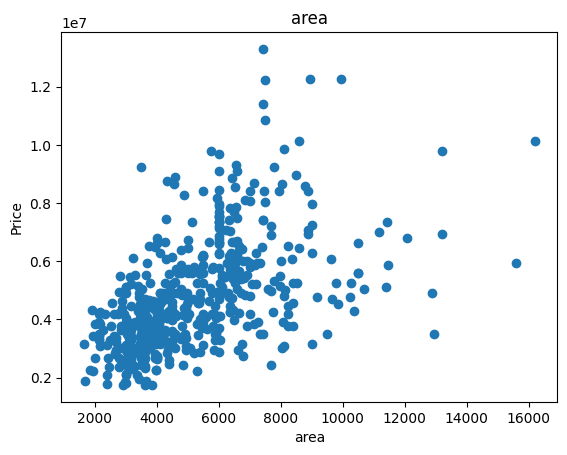

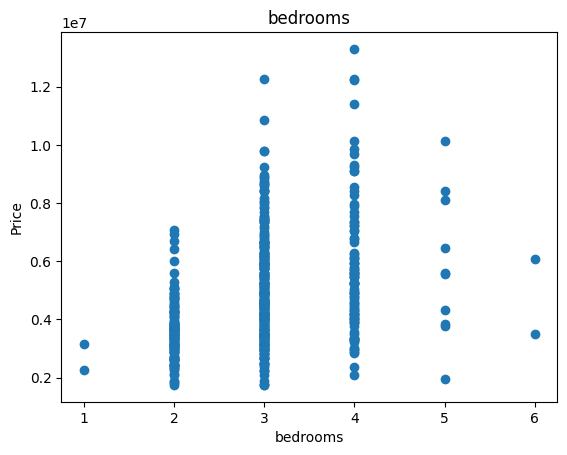

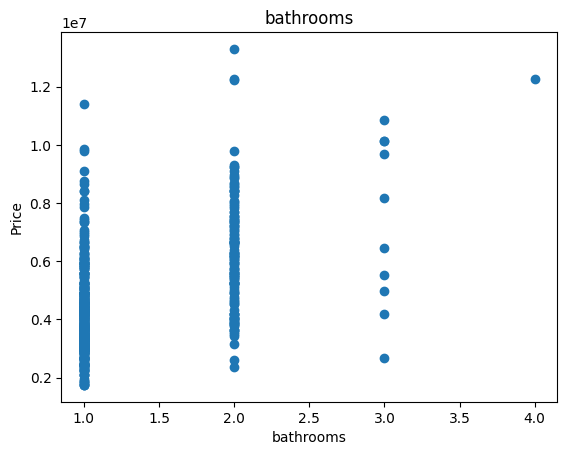

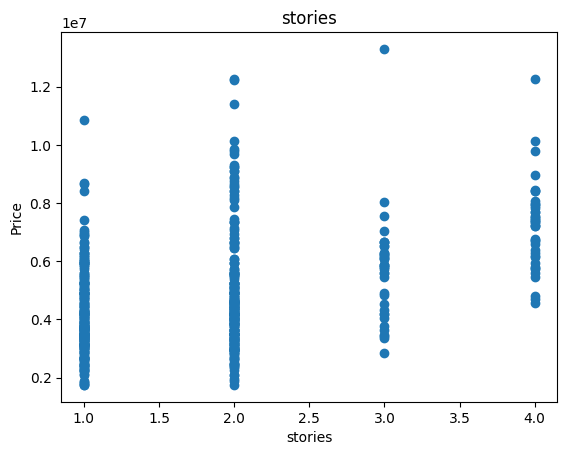

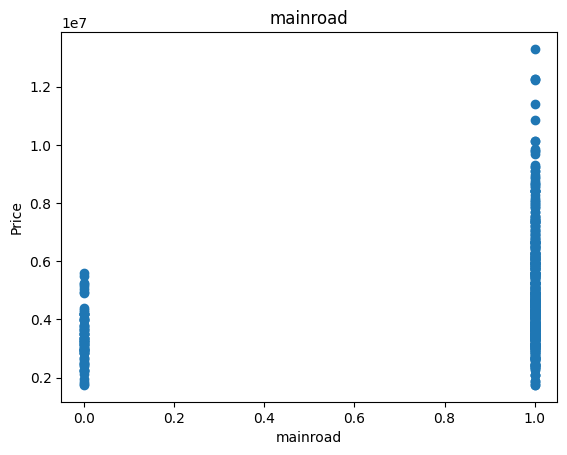

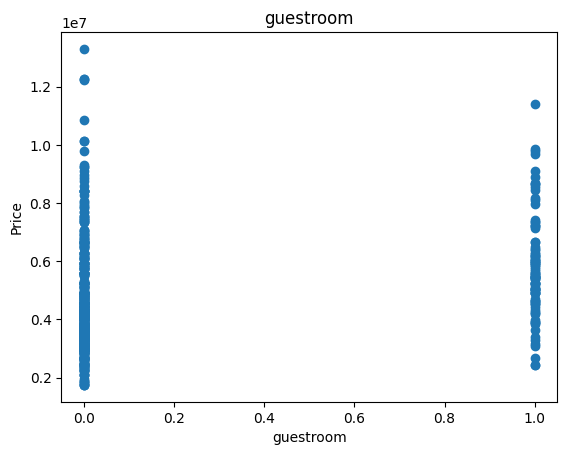

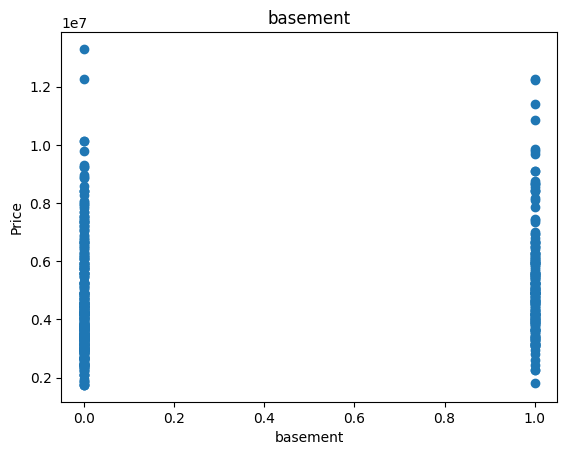

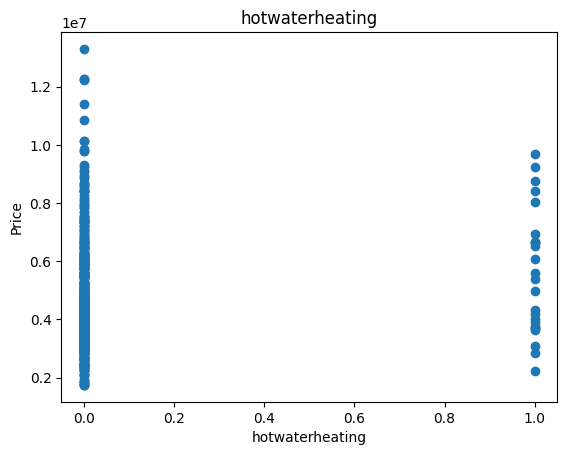

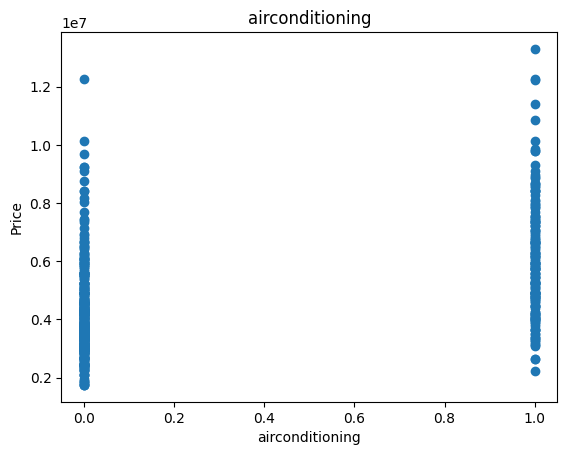

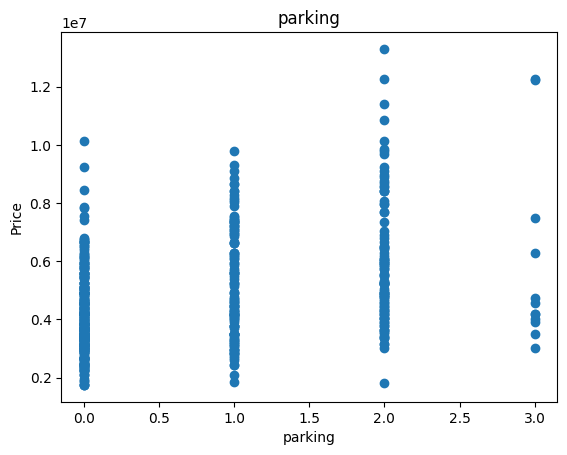

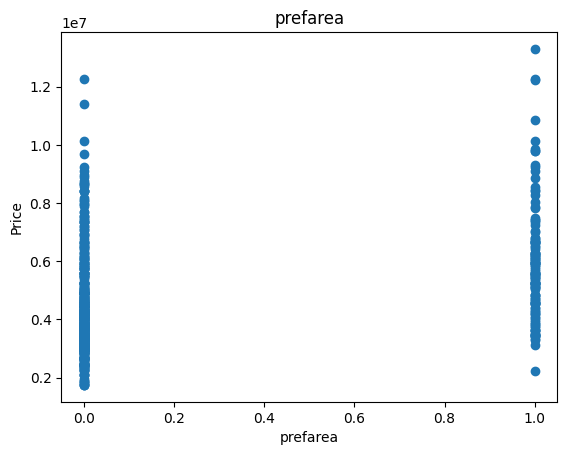

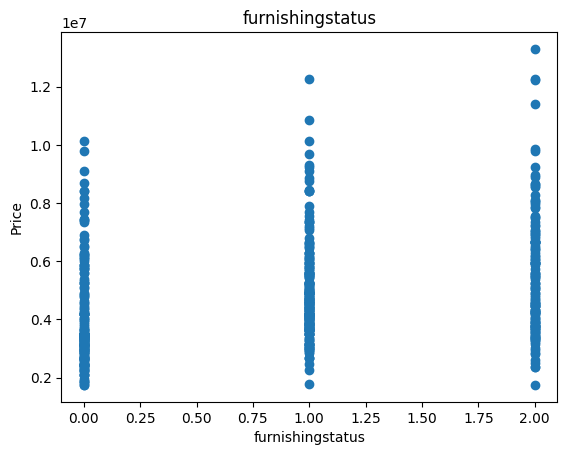

In [251]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["price"])
  plt.title(label)
  plt.ylabel("Price")
  plt.xlabel(label)
  plt.show()

#Train/Valid/Test Dataset

In [252]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [253]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)

    if x_labels is None:
        x_labels = [c for c in dataframe.columns if c != y_label]

    if len(x_labels) == 1:
        X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
        X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [254]:
_, X_train_area, y_train_area = get_xy(train, "price", x_labels=["area"])
_, X_val_area, y_val_area = get_xy(val, "price", x_labels=["area"])
_, X_test_area, y_test_area = get_xy(test, "price", x_labels=["area"])

#Multiple Regression

In [255]:
_, X_train, y_train = get_xy(train, y_label="price")
_, X_val, y_val = get_xy(val, y_label="price")
_, X_test, y_test = get_xy(test, y_label="price")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

poly_reg = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_reg.fit(X_train, y_train)

print("Validation R^2:", poly_reg.score(X_val, y_val))
print("Test R^2:", poly_reg.score(X_test, y_test))


Validation R^2: 0.6124290314547611
Test R^2: 0.46636542857601104


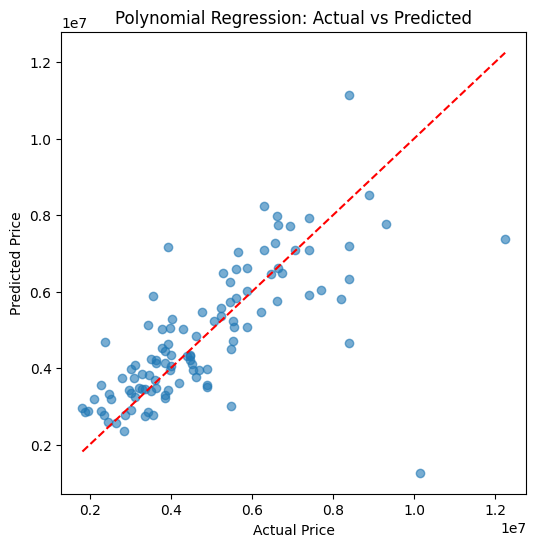

In [256]:
y_val_pred = poly_reg.predict(X_val)
y_test_pred = poly_reg.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()

In [257]:
y_test_pred = poly_reg.predict(X_test)

r2 = r2_score(y_test, y_test_pred)

mae = mean_absolute_error(y_test, y_test_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Test R²:", r2)
print("Test MAE:", mae)
print("Test RMSE:", rmse)


Test R²: 0.46636542857601104
Test MAE: 902009.0982420791
Test RMSE: 1425350.360290606
